In [ ]:
! pip install mysql-connector-python

In [ ]:
! pip install fbprophet

In [ ]:
import mysql.connector

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use(['fivethirtyeight'])
mpl.rcParams['lines.linewidth'] = 3
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import seaborn as sns 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_2005 = pd.read_csv("/content/drive/MyDrive/Service Request/311_Service_Requests_for_2005.csv", parse_dates=['Created Date', 'Closed Date', 'Resolution Action Updated Date'],index_col='Unique Key')
df_2006 = pd.read_csv("/content/drive/MyDrive/Service Request/311_Service_Requests_for_2006.csv", parse_dates=['Created Date', 'Closed Date', 'Resolution Action Updated Date'],index_col='Unique Key')
df_2007 = pd.read_csv("/content/drive/MyDrive/Service Request/311_Service_Requests_for_2007.csv", parse_dates=['Created Date', 'Closed Date', 'Resolution Action Updated Date'],index_col='Unique Key')

In [ ]:
df_2008 = pd.read_csv("/content/drive/MyDrive/Service Request/311_Service_Requests_for_2008.csv", parse_dates=['Created Date', 'Closed Date', 'Resolution Action Updated Date'],index_col='Unique Key')
df_2009 = pd.read_csv("/content/drive/MyDrive/Service Request/311_Service_Requests_for_2009.csv", parse_dates=['Created Date', 'Closed Date', 'Resolution Action Updated Date'],index_col='Unique Key')

In [ ]:
df_2009.info()

<Axes: title={'center': 'Missing values in 311_Service_Requests_for_2005'}>

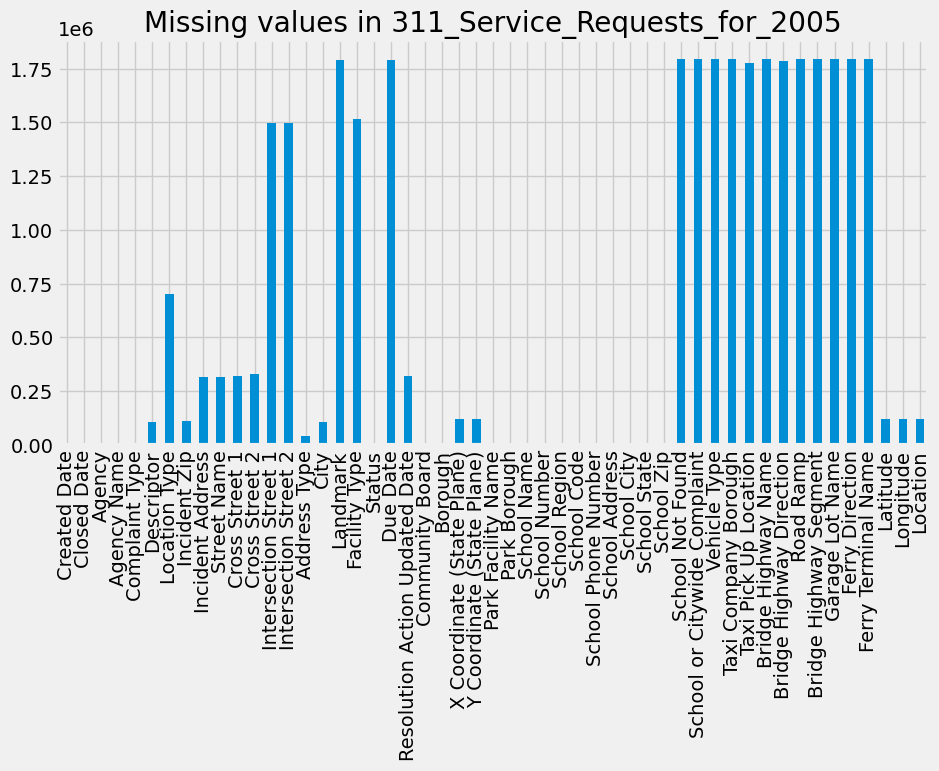

In [ ]:
df_2005.isnull().sum().plot(kind='bar', figsize=(10,5),title = 'Missing values in 311_Service_Requests_for_2005')

In [ ]:
df_2005.info()

In [ ]:
unusable= ['Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'Due Date','Resolution Action Updated Date','Community Board', 'Location']

In [ ]:
df_2005.head()

In [ ]:
df['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(6,10))
plt.show()

In [ ]:
df_2005.drop(unusable, inplace=True, axis=1)
df_2005 = df_2005[(df_2005['Closed Date'].notnull())]
df_2005 = df_2005[df_2005['Status']=='Closed']
df_2005.info()

In [ ]:
df_2006.drop(unusable, inplace=True, axis=1)
df_2006 = df_2006[(df_2006['Closed Date'].notnull())]
df_2006 = df_2006[df_2006['Status']=='Closed']
# df_2006.info()
df_2007.drop(unusable, inplace=True, axis=1)
df_2007 = df_2007[(df_2007['Closed Date'].notnull())]
df_2007 = df_2007[df_2007['Status']=='Closed']
# df_2006.info()

In [ ]:
df_2008.drop(unusable, inplace=True, axis=1)
df_2008 = df_2008[(df_2008['Closed Date'].notnull())]
df_2008 = df_2008[df_2008['Status']=='Closed']
# df_2006.info()
df_2009.drop(unusable, inplace=True, axis=1)
df_2009 = df_2009[(df_2009['Closed Date'].notnull())]
df_2009 = df_2009[df_2009['Status']=='Closed']

In [ ]:
def prepareData(df):
    df['Resolution Time'] = (df['Closed Date'] - df['Created Date']).dt.days
    df_clean=df[df['Resolution Time'].notnull()]
    df_perfect = df_clean[df_clean['Closed Date'] >= df_clean['Created Date']]
    df_perfect['Day of Week'] = df_perfect['Created Date'].dt.dayofweek
    df_perfect['Day of Month'] = df_perfect['Created Date'].dt.day
    df_perfect['Month'] = df_perfect['Created Date'].dt.month
    df_perfect['Year'] = df_perfect['Created Date'].dt.year
    df_perfect=df_perfect[df_perfect.Borough!='Unspecified']
    return df_perfect

In [ ]:
df_perfect = prepareData(df_2005)
df_perfect.shape

(975060, 28)

In [ ]:
df_perfect_2 = prepareData(df_2006)

In [ ]:
df_perfect_3 = prepareData(df_2007)

In [ ]:
df_perfect_4 = prepareData(df_2008)

In [ ]:
df_perfect_5 = prepareData(df_2009)

In [ ]:
df_perfect_4.info()

In [ ]:
(df_perfect['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                    figsize=(10,6), title = 'Most common Complaints in 2005')

In [ ]:
(df_perfect['Complaint Type'].value_counts()).tail(25).plot(kind='bar',
                    figsize=(10,6), title = 'Least frequent Complaints in 2005')

In [ ]:
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
df_perfect['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (8,6))
#plt.legend(title='BOROUGH', loc='upper right', bbox_to_anchor=(1.5,1))
plt.axis('equal')
plt.title('Complaints distribution across Boroughs in 2005')
plt.tight_layout()
plt.show()

In [ ]:
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
df_perfect_2['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (8,6))
#plt.legend(title='BOROUGH', loc='upper right', bbox_to_anchor=(1.5,1))
plt.axis('equal')
plt.title('Complaints distribution across Boroughs in 2006')
plt.tight_layout()
plt.show()

In [ ]:
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
df_perfect_3['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (8,6))
#plt.legend(title='BOROUGH', loc='upper right', bbox_to_anchor=(1.5,1))
plt.axis('equal')
plt.title('Complaints distribution across Boroughs in 2007')
plt.tight_layout()
plt.show()

### Let's see how does Brooklyn look like

In [ ]:
df_Brooklyn = df_perfect[df_perfect['Borough']=='BROOKLYN']

In [ ]:
df_Brooklyn_2 = df_perfect_2[df_perfect_2['Borough']=='BROOKLYN']

In [ ]:
df_Brooklyn_3 = df_perfect_3[df_perfect_3['Borough']=='BROOKLYN']

In [ ]:
(df_Brooklyn['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn 2005')

In [ ]:
(df_Brooklyn_2['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn 2006')

In [ ]:
(df_Brooklyn_3['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn 2007')

In [ ]:
import matplotlib.ticker as ticker

var = df_Brooklyn.groupby('Complaint Type')["Resolution Time"].mean()
frequent = df_Brooklyn['Complaint Type'].value_counts().head(25)
var = var[frequent.index]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Complaint Type')
ax1.set_ylabel('Average Response Time')
ax1.set_title("Avg Response Time of Complaints")
tick_spacing = 4
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
var.head(15).plot(kind='bar')

In [ ]:
import matplotlib.ticker as ticker

var = df_Brooklyn_2.groupby('Complaint Type')["Resolution Time"].mean()
frequent = df_Brooklyn_2['Complaint Type'].value_counts().head(25)
var = var[frequent.index]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Complaint Type')
ax1.set_ylabel('Average Response Time')
ax1.set_title("Avg Response Time of Complaints")
tick_spacing = 4
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
var.head(15).plot(kind='bar')

In [ ]:
import matplotlib.ticker as ticker

var = df_Brooklyn_3.groupby('Complaint Type')["Resolution Time"].mean()
frequent = df_Brooklyn_3['Complaint Type'].value_counts().head(25)
var = var[frequent.index]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Complaint Type')
ax1.set_ylabel('Average Response Time')
ax1.set_title("Avg Response Time of Complaints")
tick_spacing = 4
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
var.head(15).plot(kind='bar')

In [ ]:
import matplotlib.ticker as ticker

var = df_Brooklyn.groupby('Agency')['Resolution Time'].mean()
frequent = df_Brooklyn['Agency'].value_counts().head(25)
var1 = var[frequent.index]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Agencies')
ax1.set_ylabel('Average Response Time')
ax1.set_title("Avg Response Time of Agencies")
tick_spacing = 50
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
var1.head(25).plot(kind='bar')

In [ ]:
import matplotlib.ticker as ticker

var = df_Brooklyn_2.groupby('Agency')['Resolution Time'].mean()
frequent = df_Brooklyn_2['Agency'].value_counts().head(25)
var1 = var[frequent.index]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Agencies')
ax1.set_ylabel('Average Response Time')
ax1.set_title("Avg Response Time of Agencies")
tick_spacing = 50
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
var1.head(25).plot(kind='bar')

In [ ]:
import matplotlib.ticker as ticker

var = df_Brooklyn_3.groupby('Agency')['Resolution Time'].mean()
frequent = df_Brooklyn_3['Agency'].value_counts().head(25)
var1 = var[frequent.index]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Agencies')
ax1.set_ylabel('Average Response Time')
ax1.set_title("Avg Response Time of Agencies")
tick_spacing = 50
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
var1.head(25).plot(kind='bar')

In [ ]:
(df_Brooklyn['Location Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'The number of complaints corresponding to location type')

In [ ]:
(df_Brooklyn_2['Location Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'The number of complaints corresponding to location type')

In [ ]:
(df_Brooklyn_3['Location Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'The number of complaints corresponding to location type')

In [ ]:
df_Brooklyn_2.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Complaints concentration across Brooklyn', figsize=(10,6)).axis('equal')

In [ ]:
df_Brooklyn_3.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Complaints concentration across Brooklyn', figsize=(10,6)).axis('equal')

### Working with the most frequent complaint Brooklyn i.e street light condition and sewers

In [ ]:
df_perfect[df_perfect['Complaint Type'] == 'Street Light Condition']['Descriptor'].value_counts()

In [ ]:
df_perfect[df_perfect['Complaint Type'] == 'Traffic Signal Condition']['Descriptor'].value_counts()

In [ ]:
df_Brook_Street_Light = df_Brooklyn[df_Brooklyn['Complaint Type'] == 'Street Light Condition']

In [ ]:
df_Brook_Street_Light_2 = df_Brooklyn_2[df_Brooklyn_2['Complaint Type'] == 'Street Light Condition']

In [ ]:
df_Brook_Street_Light[df_Brook_Street_Light['Complaint Type'] == 'Street Light Condition'].plot(
    kind='hexbin', x='Longitude', y='Latitude', gridsize=40,title = 'Street light issues concentration across Brooklyn\n',
    colormap='jet', mincnt=1, figsize=(10,6)).axis('equal')

In [ ]:
df_Brook_Street_Light['Month'].value_counts().plot(kind = 'bar',figsize=(10,6), title = 'Volume of Street light issues by Month\n')

In [ ]:
df_Brook_Sewer = df_Brooklyn[df_Brooklyn['Complaint Type'] == 'Sewer']
df_Brook_Sewer['Month'].value_counts().plot(kind = 'bar',figsize=(10,6), title = 'Volume of Sewer issues by Month\n')

## Let's predict the resolution time for Street Light issues in Brooklyn given the 2005 data


In [ ]:
def getDfSummary(input_data):
    number_nan = input_data.isnull().sum()
    number_distinct = input_data.nunique(dropna=True)
    output_data = pd.DataFrame({'number_nan':number_nan,'number_distinct':number_distinct})
    return output_data

In [ ]:
getDfSummary(df_Brook_Street_Light)

In [ ]:
def buildFeatures(dataset):
    df_features = dataset.filter(['Descriptor','Incident Zip','Resolution Time','Day of Week','Day of Month','Month'],axis = 1)
    data = pd.DataFrame({'descriptor': df_features.Descriptor})
    dummies=pd.get_dummies(data)
    df_model=pd.concat([df_features,dummies],axis=1)
    df_model = df_model.drop('Descriptor',1)
    df_model = df_model.dropna()
    df_model['Incident Zip'] = df_model['Incident Zip'].astype(int)
    df_model['Resolution Time']=df_model['Resolution Time'].astype(int)
    df_model['Incident Zip']=df_model['Incident Zip']-df_model['Incident Zip'].min()
    return df_model

In [ ]:
df_model = buildFeatures(df_Brook_Street_Light)
# df_model = df_model[['Incident Zip','Day of Week','Day of Month','Month','descriptor_APARTMENT ONLY',
#                      'descriptor_ENTIRE BUILDING','Resolution_Time']]
# df_model.describe()

In [ ]:
df_test = buildFeatures(df_Brook_Street_Light_2)

In [ ]:
df_model.head()

In [ ]:
df_test.describe()

[0, 1] - very fast response, within 1 day

(1, 3] - fast response, between 1 and 3 days

(3, 7] - moderate response, between 3 and 7 days

(7, 30] - slow response, between 1 and 4 weeks

(30, 365] - very slow response, more than 1 month

(365, 1089] - very very slow response, more than 1 year

In [ ]:
# Since the data is highly imbalanced we are removing few outliers.
df_model.drop(df_model[df_model["Resolution Time"] > 365].index, inplace=True)
df_model["Resolution Time"].value_counts()

1      2403
2      1868
3      1567
4      1317
5      1235
       ... 
352       1
134       1
154       1
296       1
194       1
Name: Resolution Time, Length: 352, dtype: int64

In [ ]:
# Since the data is highly imbalanced we are removing few outliers.
df_test.drop(df_test[df_test["Resolution Time"] > 365].index, inplace=True)
# df_test["Resolution Time"].value_counts()

1      3167
2      1736
0      1576
3      1381
4      1202
       ... 
117       1
281       1
335       1
297       1
261       1
Name: Resolution Time, Length: 334, dtype: int64

In [ ]:
bins = [0,1,3,7,30,365]
group_names = [0,1,2,3,4]
df_model['categories'] = pd.cut(df_model['Resolution Time'], bins,include_lowest=True,labels=group_names)
df_model.describe()

In [ ]:
df_test['categories'] = pd.cut(df_test['Resolution Time'], bins,include_lowest=True,labels=group_names)

In [ ]:
getDfSummary(df_model)

In [ ]:
def splitter(dataset,dataset_test,y,y_test):
    # X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.3)
    # return X_train,X_test,y_train,y_test
    dataset = dataset.reindex(columns=dataset_test.columns, fill_value=0)
    dataset_test = dataset_test.reindex(columns=dataset.columns, fill_value=0)
    X_train = dataset
    X_test = dataset_test
    y_train = y
    y_test = y_test
    return X_train,X_test,y_train,y_test

### Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = splitter(df_model,df_test,df_model['categories'],df_test['categories'])
X1 = X_train.drop(['Resolution Time','categories'],1)
Y1 = y_train
X2 = X_test.drop(['Resolution Time','categories'],1)
Y2 = y_test
log=LogisticRegression(C=1e30)
log.fit(X1,Y1)
accuracy_score(Y2,log.predict(X2))


0.281839755904622

In [ ]:
y_train.head()

Unique Key
620853    0
620899    3
640470    3
640884    1
532170    3
Name: categories, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import scipy as sp
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X1,Y1)
y1_model = clf.score(X1,Y1)
y2_model = clf.score(X2,Y2)
print("Accuracy on training dataset = ",y1_model*100,"%","\nAccuracy on test dataset = ",y2_model*100,"%")

Accuracy on training dataset =  84.6215522771007 % 
Accuracy on test dataset =  26.79398802124534 %


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X1, Y1)

predicted = rf.predict(X2)
accuracy = accuracy_score(Y2, predicted)
accuracy

0.28466493389083514

# Time Series Analysis on all 5 boroughs


In [ ]:
df_perfect_all = pd.concat([df_perfect, df_perfect_2, df_perfect_3])

In [ ]:
df_perfect_all.info()

In [ ]:
time = df_perfect_all['Created Date'].value_counts()
print(time.size)
#Considering days where atleast 25 calls were made in a day
time = time[time > 25]
print(time.size)

1095
1095


In [ ]:
time_test_2008 = df_perfect_4['Created Date'].value_counts()
print(time_test_2008.size)
#Considering days where atleast 25 calls were made in a day
time_test_2008 = time_test_2008[time_test_2008 > 25]
print(time_test_2008.size)

366
366


In [ ]:
time_test_2009 = df_perfect_5['Created Date'].value_counts()
print(time_test_2009.size)
#Considering days where atleast 25 calls were made in a day
time_test_2009 = time_test_2009[time_test_2009 > 25]
print(time_test_2009.size)

In [ ]:
time.head()

2007-07-18    6547
2006-07-18    5632
2007-08-08    5391
2006-02-14    4884
2006-07-19    4752
Name: Created Date, dtype: int64

In [ ]:
volume = pd.DataFrame({'ds':time.index, 'y':time.values})
volume['y_orig'] = volume['y'] # to save a copy of the original data.. 
# log-transform y
volume['y'] = np.log(volume['y'])
volume.shape

(1095, 3)

In [ ]:
volume_test_2008 = pd.DataFrame({'ds':time_test_2008.index, 'y':time_test_2008.values})
volume_test_2008['y_orig'] = volume_test_2008['y'] # to save a copy of the original data.. 
# log-transform y
volume_test_2008['y'] = np.log(volume_test_2008['y'])
volume_test_2008.shape

(366, 3)

In [ ]:
volume_test_2009 = pd.DataFrame({'ds':time_test_2009.index, 'y':time_test_2009.values})
volume_test_2009['y_orig'] = volume_test_2009['y'] # to save a copy of the original data.. 
# log-transform y
volume_test_2009['y'] = np.log(volume_test_2009['y'])
volume_test_2009.shape

In [ ]:
%matplotlib inline
 
plt.rcParams['figure.figsize']=(14,10)
volume.set_index('ds').y.plot()

In [ ]:
!pip install prophet

In [ ]:
volume_test_2008.info()

In [ ]:
future.info()

In [ ]:
from prophet import Prophet 
m = Prophet(yearly_seasonality=True)
m.fit(volume)
future = m.make_future_dataframe(periods=60)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxesw6e0w/yv7ogcmm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxesw6e0w/zebpo2sv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8807', 'data', 'file=/tmp/tmpxesw6e0w/yv7ogcmm.json', 'init=/tmp/tmpxesw6e0w/zebpo2sv.json', 'output', 'file=/tmp/tmpxesw6e0w/prophet_modellb21tvl7/prophet_model-20230421113124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:31:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:31:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1150,2008-02-25,7.997376,7.807755,8.176322
1151,2008-02-26,8.050378,7.850072,8.262316
1152,2008-02-27,8.052064,7.863495,8.263284
1153,2008-02-28,8.020906,7.835415,8.223422
1154,2008-02-29,7.986713,7.790813,8.195520


In [ ]:
x = m.plot_components(forecast)


In [ ]:
x = m.plot(forecast)

0.022938934759606167


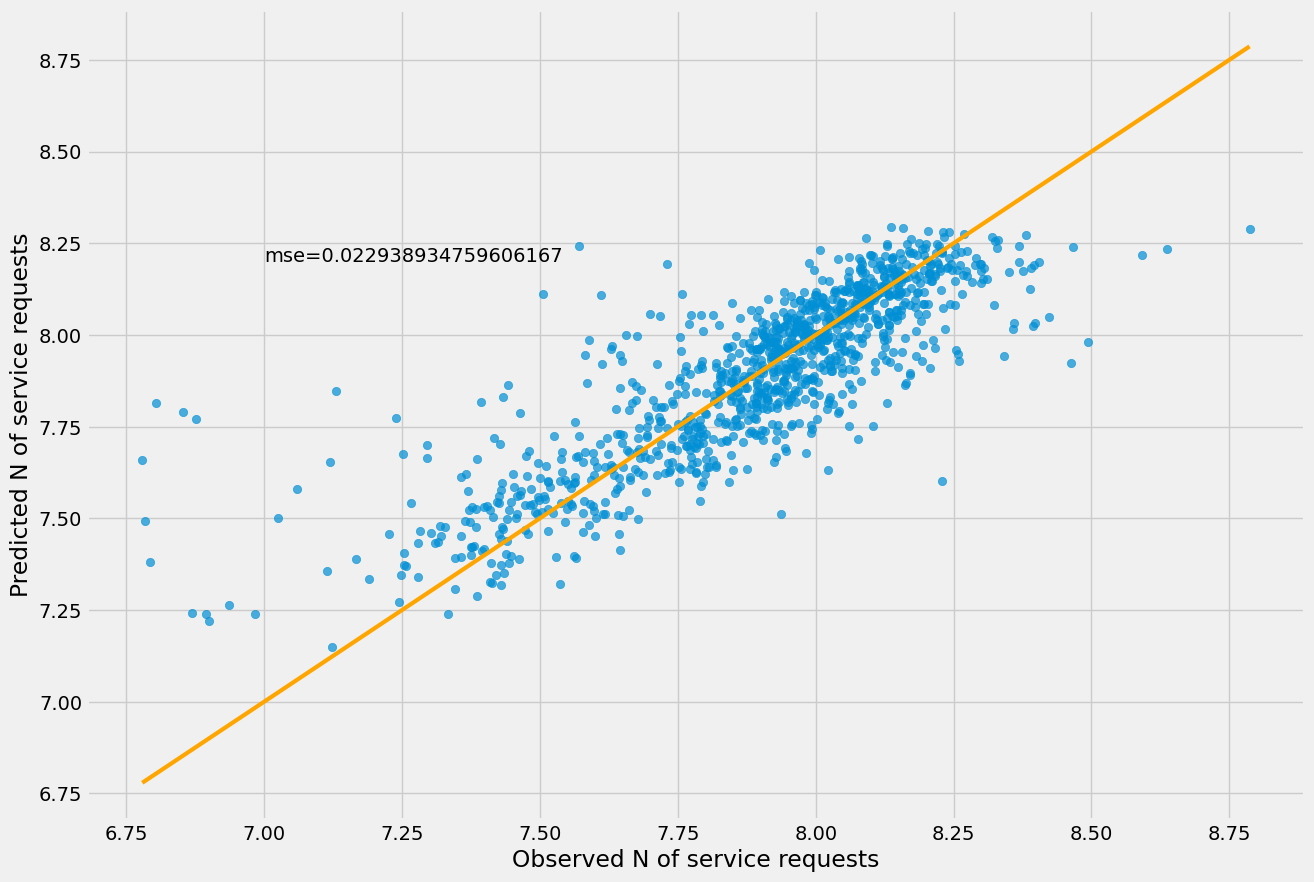

In [ ]:
joined_df = volume.merge(forecast, left_on='ds', right_on='ds')
from sklearn.metrics import mean_squared_error, r2_score
plt.scatter(joined_df.y, joined_df.yhat, alpha = 0.7)
mean_squared_error(joined_df.y, joined_df.yhat)
print(mean_squared_error(joined_df.y, joined_df.yhat))
plt.xlabel('Observed N of service requests')
plt.ylabel('Predicted N of service requests')
plt.text(7.0,8.2,"mse="+str(mean_squared_error(joined_df.y, joined_df.yhat)))
plt.plot([joined_df.y.min(),joined_df.y.max()],[joined_df.y.min(),joined_df.y.max()], color='orange')

# 2008


In [ ]:
volume_test_2008.tail()

,ds,y,y_orig
361,2008-01-20,7.170120,1300
362,2008-11-30,7.081709,1190
363,2008-01-01,7.068172,1174
364,2008-12-25,6.905753,998
365,2008-11-27,6.809039,906


In [ ]:
x_test_2008 = pd.concat([volume[['ds']],volume_test_2008[['ds']]])

In [ ]:
forecast_on_2008 = m.predict(x_test_2008)
forecast_on_2008[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1456,2008-12-27,7.422557,7.218921,7.619224
1457,2008-12-28,7.298396,7.091894,7.494758
1458,2008-12-29,7.727554,7.531577,7.926448
1459,2008-12-30,7.783155,7.583038,7.984913
1460,2008-12-31,7.789809,7.571790,7.998327


0.022938934759606167


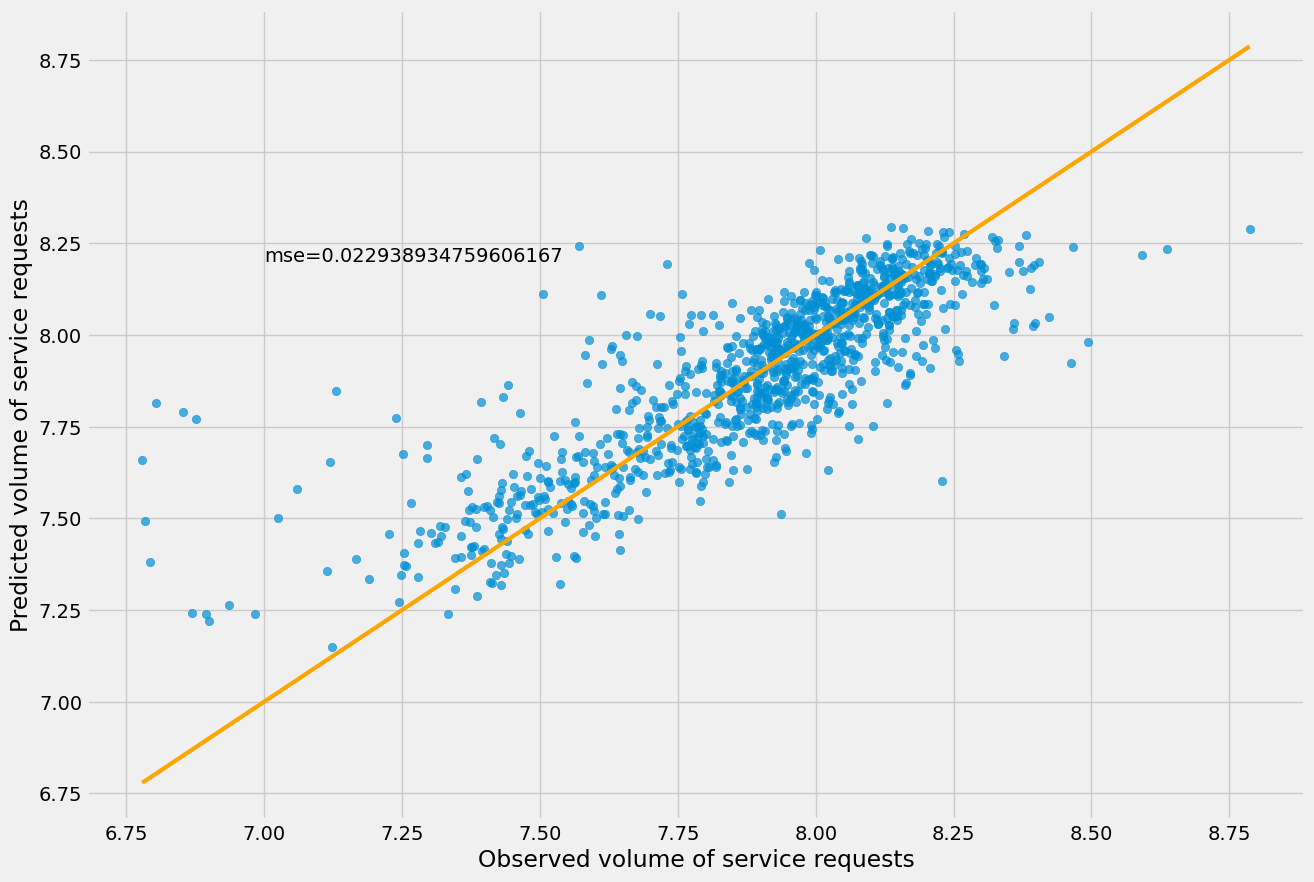

In [ ]:
joined_df_test = volume.merge(forecast_on_2008, left_on='ds', right_on='ds')
plt.scatter(joined_df_test.y, joined_df_test.yhat, alpha = 0.7)
print(mean_squared_error(joined_df_test.y, joined_df_test.yhat))
plt.xlabel('Observed volume of service requests')
plt.ylabel('Predicted volume of service requests')
plt.text(7.0,8.2,"mse="+str(mean_squared_error(joined_df_test.y, joined_df_test.yhat)))
plt.plot([joined_df_test.y.min(),joined_df_test.y.max()],[joined_df_test.y.min(),joined_df_test.y.max()], color='orange')

In [ ]:
x = m.plot(forecast_on_2008)

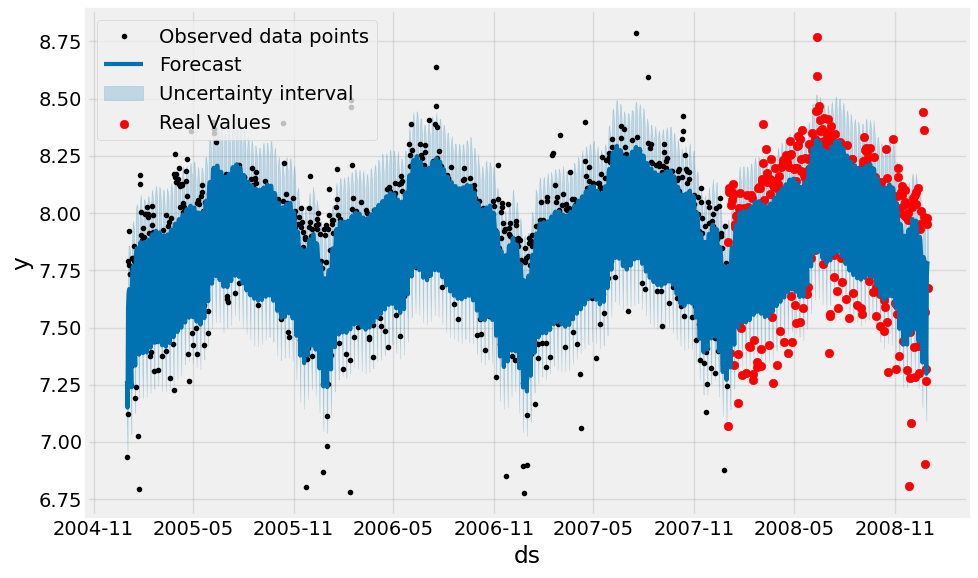

In [ ]:
fig = m.plot(forecast_on_2008)
y_test = volume_test_2008['y'].values
time_test = volume_test_2008['ds']
plt.scatter(time_test, y_test, color='red', label='Real Values')
plt.legend()
plt.show()